In [1]:
%tensorflow_version 2.x
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

#----------DATA READING 
filename = 'https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv'
# read file
csv_data = pd.read_csv(filename, sep=',')
print(csv_data.head())


   120    4  setosa  versicolor  virginica
0  6.4  2.8     5.6         2.2          2
1  5.0  2.3     3.3         1.0          1
2  4.9  2.5     4.5         1.7          2
3  4.9  3.1     1.5         0.1          0
4  5.7  3.8     1.7         0.3          0


![alt text](https://www.tensorflow.org/images/iris_three_species.jpg)

In [2]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']
#----------DATA CLEANUP 
csv_data.columns = column_names # new_header #set the header row as the data header
print(csv_data.head()) 
# look at simple data statistics
print(csv_data.describe().transpose())

   sepal_length  sepal_width  petal_length  petal_width  species
0           6.4          2.8           5.6          2.2        2
1           5.0          2.3           3.3          1.0        1
2           4.9          2.5           4.5          1.7        2
3           4.9          3.1           1.5          0.1        0
4           5.7          3.8           1.7          0.3        0
              count      mean       std  min    25%  50%    75%  max
sepal_length  120.0  5.845000  0.868578  4.4  5.075  5.8  6.425  7.9
sepal_width   120.0  3.065000  0.427156  2.0  2.800  3.0  3.300  4.4
petal_length  120.0  3.739167  1.822100  1.0  1.500  4.4  5.100  6.9
petal_width   120.0  1.196667  0.782039  0.1  0.300  1.3  1.800  2.5
species       120.0  1.000000  0.840168  0.0  0.000  1.0  2.000  2.0


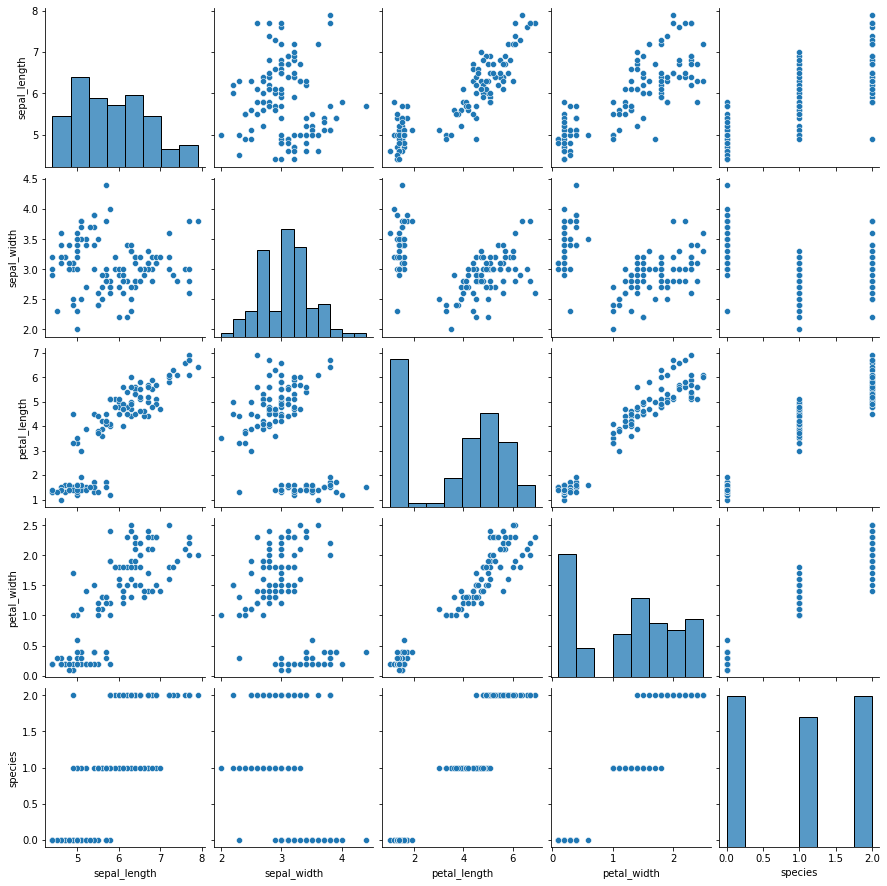

In [3]:
# plot of all features agains each other
sns.pairplot(csv_data)

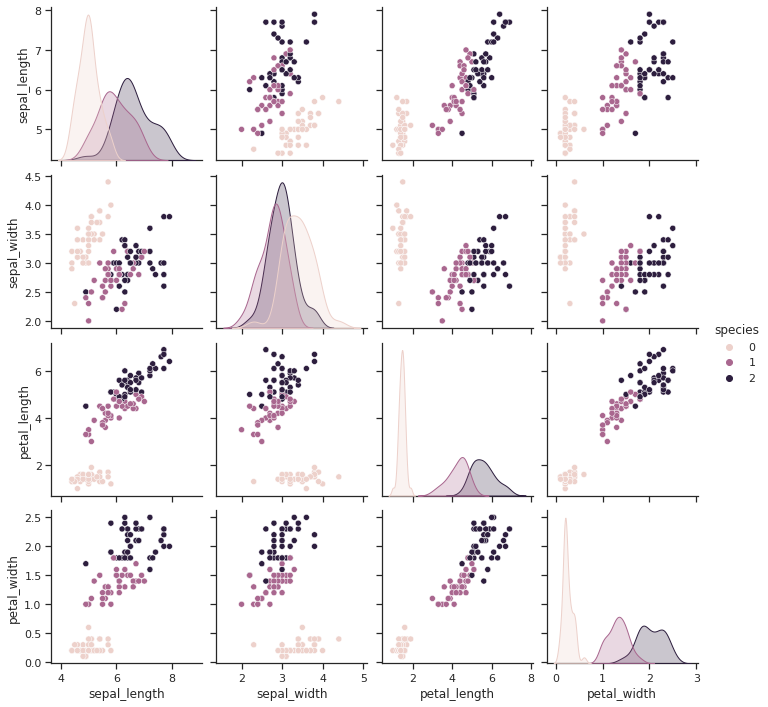

In [4]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(csv_data, hue='species') 

In [5]:
#----------TRAIN/TEST SPLIT 
train_data = csv_data.sample(frac=0.8) # take 80% randomly from the data for training
test_data = csv_data.drop(train_data.index) # reserve the rest for testing

# separate out the y (results) from x (features) for training
x_train = train_data.drop('species', axis=1)
y_train = train_data['species']
# normalize the training data
x_train = (x_train-x_train.min())/(x_train.max()-x_train.min())

# separate out the y (results) from x (features) testing
x_test = test_data.drop('species', axis=1)
y_test = test_data['species']
# normalize the test data
x_test = (x_test-x_test.min())/(x_test.max()-x_test.min()) 

print('Training Data\n', x_train.describe().transpose())
print('Test Data\n', x_test.describe().transpose())

Training Data
               count      mean       std  min       25%       50%       75%  max
sepal_length   96.0  0.409821  0.244302  0.0  0.171429  0.400000  0.600000  1.0
sepal_width    96.0  0.442708  0.178346  0.0  0.333333  0.416667  0.541667  1.0
petal_length   96.0  0.465749  0.305619  0.0  0.084746  0.576271  0.699153  1.0
petal_width    96.0  0.462674  0.323115  0.0  0.083333  0.520833  0.708333  1.0
Test Data
               count      mean       std  min       25%       50%       75%  max
sepal_length   24.0  0.450758  0.284452  0.0  0.287879  0.424242  0.583333  1.0
sepal_width    24.0  0.514706  0.254492  0.0  0.352941  0.500000  0.705882  1.0
petal_length   24.0  0.445216  0.358442  0.0  0.037037  0.546296  0.689815  1.0
petal_width    24.0  0.428030  0.373848  0.0  0.000000  0.454545  0.681818  1.0


In [6]:
#--------MODEL BUILDING
num_params = len(x_train.keys())
print(num_params)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer([num_params], name="Input_Layer"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_01"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_02"),
    # 3 nodes in the output for 'species'
    tf.keras.layers.Dense(3, name="Output_Layer")
  ])

model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              # loss function to minimize
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              # list of metrics to monitor
              metrics=['acc',])

model.summary()

4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_01 (Dense)             (None, 32)                160       
_________________________________________________________________
dense_02 (Dense)             (None, 32)                1056      
_________________________________________________________________
Output_Layer (Dense)         (None, 3)                 99        
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
_________________________________________________________________


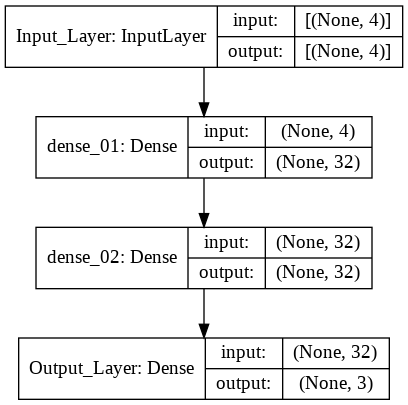

In [7]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

In [8]:
#--------SANITY CHECK
# take an example batch and try to predict (we haven't trained yet!)
example_batch = x_train[:10]
# this gives the log likelihood of the the classes
example_result_log = model.predict(example_batch)
print('Likelihood', example_result_log)
# this gives the probabilities of the classes (should sum up to 1)
example_result_prob = tf.nn.softmax(example_result_log).numpy()
# these values should be similar and equal to (1/3), because we haven't trained yet and weights are random
print('Probabilities', example_result_prob)


Likelihood [[-0.1930115  -0.0299409  -0.06248986]
 [-0.32414484 -0.1241814  -0.12187506]
 [-0.10829732 -0.06912667 -0.05910072]
 [-0.11747406 -0.07418861 -0.0497546 ]
 [-0.26185986 -0.10476626 -0.08652592]
 [-0.3565902  -0.11611949 -0.11690849]
 [-0.17248705 -0.11005946 -0.06940956]
 [-0.16475597 -0.08305058 -0.01041734]
 [-0.10506485 -0.06794685 -0.0491621 ]
 [-0.28075445 -0.11173981 -0.06556258]]
Probabilities [[0.30151883 0.35492378 0.3435574 ]
 [0.29023057 0.35447547 0.35529396]
 [0.32358533 0.3365119  0.33990273]
 [0.32109937 0.3353035  0.3435972 ]
 [0.2974642  0.34806436 0.35447145]
 [0.2822712  0.35900596 0.3587228 ]
 [0.31515968 0.33546144 0.34937885]
 [0.30750102 0.33368042 0.3588186 ]
 [0.32306936 0.3352864  0.3416442 ]
 [0.29203582 0.34581056 0.36215356]]


In [14]:
# Fit/TRAIN model on training data
history = model.fit(x_train, y_train,
                    batch_size=4,
                    epochs=20,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/20
19/19 [==============================] - 0s 4ms/step - loss: 0.4277 - acc: 0.8289 - val_loss: 0.4116 - val_acc: 0.7000
Epoch 2/20
19/19 [==============================] - 0s 3ms/step - loss: 0.4123 - acc: 0.7500 - val_loss: 0.3964 - val_acc: 0.7000
Epoch 3/20
19/19 [==============================] - 0s 3ms/step - loss: 0.3963 - acc: 0.7895 - val_loss: 0.3704 - val_acc: 0.8000
Epoch 4/20
19/19 [==============================] - 0s 2ms/step - loss: 0.3859 - acc: 0.8289 - val_loss: 0.3545 - val_acc: 0.8000
Epoch 5/20
19/19 [==============================] - 0s 2ms/step - loss: 0.3671 - acc: 0.8553 - val_loss: 0.3534 - val_acc: 0.8000
Epoch 6/20
19/19 [==============================] - 0s 2ms/step - loss: 0.3576 - acc: 0.8684 - val_loss: 0.3428 - val_acc: 0.8000
Epoch 7/20
19/19 [==============================] - 0s 2ms/step - loss: 0.3440 - acc: 0.8553 - val_loss: 0.3164 - val_acc: 0.9000
Epoch 8/20
19/19 [==============================] - 0s 3ms/step - loss: 0.3290 - acc: 0.90

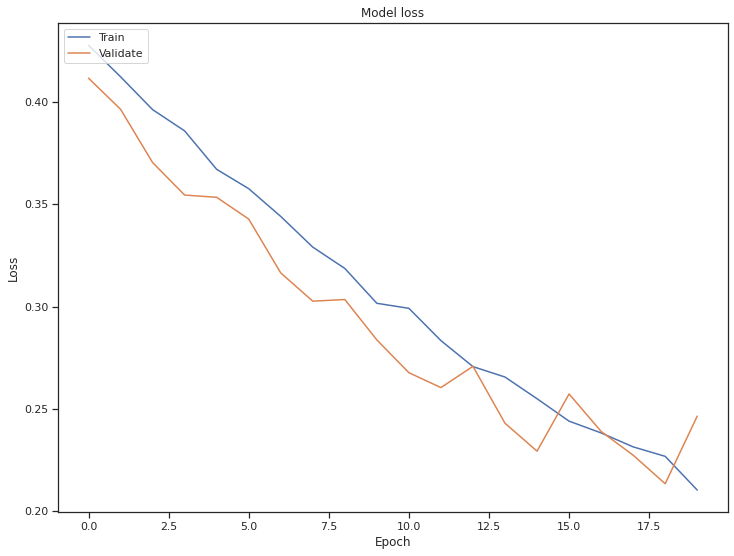

In [15]:
#--------MONITOR
# Plot training & validation loss values
fig = plt.figure(figsize=(12,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [16]:
#--------EVALUATE
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print('Loss:', loss, 'Accuracy:', acc)

1/1 - 0s - loss: 0.1530 - acc: 1.0000
Loss: 0.15301513671875 Accuracy: 1.0


In [17]:
#--------PREDICT

p_test = model.predict(x_test) # get the log likelihoods
p_test_probabs = tf.nn.softmax(p_test).numpy() # convert to probabilities
p_test_class = np.argmax(p_test_probabs, axis=1) # get the max out of the 3 probabilities
print("Predicted Class:", p_test_class, '\nActuals:\n', y_test.to_string(index=False))
#p_test = model.predict_classes(x_test)
#print(p_test)

Predicted Class: [2 1 2 0 1 1 2 2 2 0 0 2 1 1 0 1 0 2 1 0 0 0 1 0] 
Actuals:
  2
 1
 2
 0
 1
 1
 2
 2
 2
 0
 0
 2
 1
 1
 0
 1
 0
 2
 1
 0
 0
 0
 1
 0


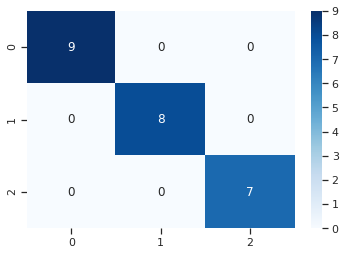

In [18]:
# plot the confision matrix as heatmap
sns.heatmap(tf.math.confusion_matrix(y_test, p_test_class), cmap="Blues", annot=True)